In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Configuration
FILE_PATH = 'manufacturing_dataset_1000_samples.csv'
TARGET_COLUMN = 'Parts_Per_Hour'
RANDOM_STATE = 42

# Define Feature Groups
NUMERICAL_FEATURES = [
    'Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time',
    'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience',
    'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time',
    'Efficiency_Score', 'Machine_Utilization'
]
CATEGORICAL_FEATURES = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']


In [9]:
df = pd.read_csv(r"C:\Users\sruja\Downloads\manufacturing_dataset_1000_samples.csv")

print(f"Data Shape: {df.shape}")
print("\nFirst 5 Rows:")
print(df.head())
print("\nData Information (Dtypes & Nulls):")
df.info()

Data Shape: (1000, 19)

First 5 Rows:
             Timestamp  Injection_Temperature  Injection_Pressure  Cycle_Time  \
0  2023-01-01 00:00:00                  221.0               136.0        28.7   
1  2023-01-01 01:00:00                  213.3               128.9        34.5   
2  2023-01-01 02:00:00                  222.8               115.9        19.9   
3  2023-01-01 03:00:00                  233.3               105.3        39.2   
4  2023-01-01 04:00:00                  212.2               125.5        45.0   

   Cooling_Time  Material_Viscosity  Ambient_Temperature  Machine_Age  \
0          13.6               375.5                 28.0          3.8   
1          14.0               215.8                 22.6          6.8   
2           9.5               307.0                 25.3          4.2   
3          13.1               137.8                 26.0          9.2   
4           9.9               298.2                 23.6          6.2   

   Operator_Experience  Maintenance_

In [10]:
# Cell 3: Clean and Initial Preprocessing

# Drop the 'Timestamp' column as it's not used directly as a feature
df = df.drop(columns=['Timestamp'])

# Summary Statistics
print("Summary Statistics for Numerical Features:")
print(df.describe().T)

# Check for Missing Values (NaN)
print("\nMissing Value Counts per Column:")
print(df.isnull().sum())

Summary Statistics for Numerical Features:
                             count        mean        std      min        25%  \
Injection_Temperature       1000.0  215.315900  11.995507  180.000  207.20000   
Injection_Pressure          1000.0  116.075000  14.667246   80.000  105.90000   
Cycle_Time                  1000.0   35.851700   8.353490   16.300   28.80000   
Cooling_Time                1000.0   11.923200   2.304290    8.000   10.27500   
Material_Viscosity           980.0  251.630714  73.348695  104.600  200.90000   
Ambient_Temperature          980.0   22.941224   2.773712   18.000   20.80000   
Machine_Age                 1000.0    7.855900   3.900798    1.000    4.70000   
Operator_Experience          980.0   30.795204  27.684769    1.000    9.80000   
Maintenance_Hours           1000.0   50.580000  16.014558   26.000   45.00000   
Temperature_Pressure_Ratio  1000.0    1.885852   0.274323    1.286    1.68375   
Total_Cycle_Time            1000.0   47.737000   8.671153   24.600

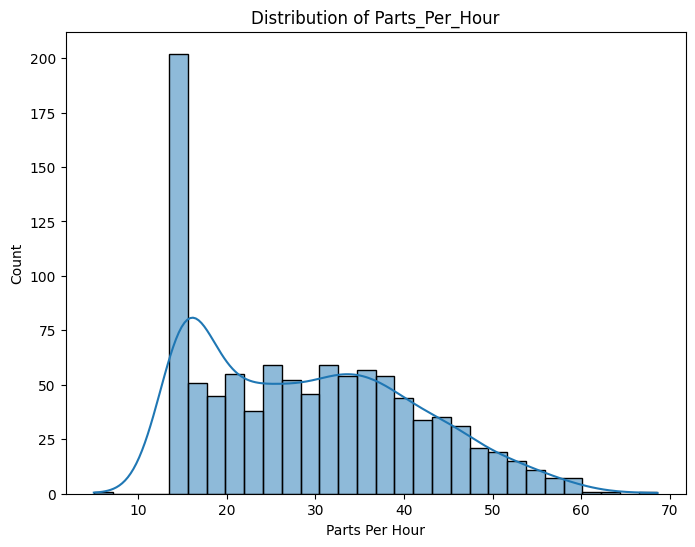

In [11]:
# Cell 4: EDA - Visualize Target Variable Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df[TARGET_COLUMN], kde=True, bins=30)
plt.title(f'Distribution of {TARGET_COLUMN}')
plt.xlabel('Parts Per Hour')
plt.show()



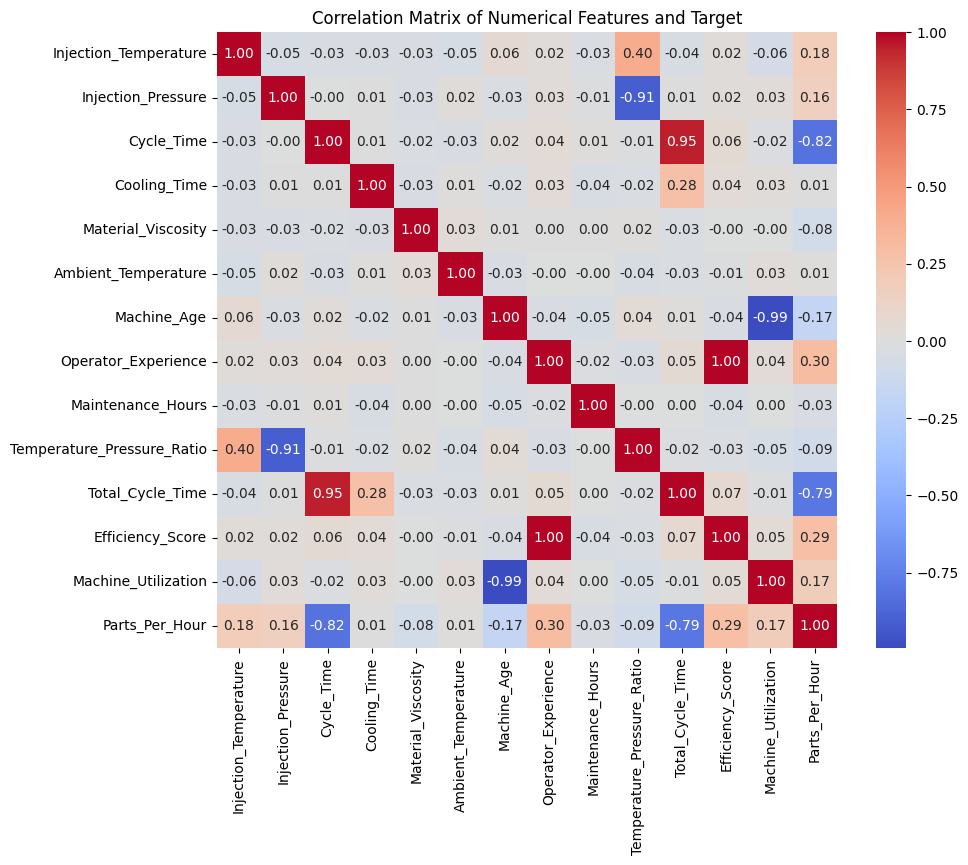

In [12]:
# Cell 5: EDA - Correlation with Target Variable (Optional but Recommended)

# Calculate correlation matrix
corr_matrix = df[NUMERICAL_FEATURES + [TARGET_COLUMN]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()

# Observe variables strongly correlated with 'Parts_Per_Hour' (the target).
# For instance, a strong negative correlation with 'Cycle_Time' and 'Total_Cycle_Time' is expected.


In [13]:
# Cell 6: Separate Features and Target & Split Data

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 800
Testing set size: 200


In [14]:
# Cell 7: Define the Preprocessing and Modeling Pipeline

# 1. Numerical Pipeline: Impute missing values with the median, then scale.
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 2. Categorical Pipeline: Impute missing values with 'missing', then One-Hot Encode.
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. Column Transformer: Apply pipelines to correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, NUMERICAL_FEATURES),
        ('cat', categorical_pipeline, CATEGORICAL_FEATURES)
    ],
    remainder='passthrough'
)

# 4. Final Model Pipeline: Preprocessor + Linear Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
print("\n⏳ Training Linear Regression model...")
model_pipeline.fit(X_train, y_train)
print("✅ Training complete.")


⏳ Training Linear Regression model...
✅ Training complete.


In [15]:
# Cell 8: Prediction and Evaluation

y_pred = model_pipeline.predict(X_test)

# Calculate Required Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("       📊 Model Evaluation Results (Linear Regression)      ")
print("="*50)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Squared Error (MSE):       {mse:.4f}")
print(f"R-squared (R2 Score):           {r2:.4f}")
print("="*50)


       📊 Model Evaluation Results (Linear Regression)      
Root Mean Squared Error (RMSE): 3.5078
Mean Squared Error (MSE):       12.3045
R-squared (R2 Score):           0.9057


In [16]:
# Cell 9: Model Interpretation (The Optimization Key)

# Get feature names after One-Hot Encoding
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(CATEGORICAL_FEATURES)
feature_names = NUMERICAL_FEATURES + list(ohe_feature_names)

# Get coefficients
coefficients = model_pipeline.named_steps['regressor'].coef_

# Create a DataFrame for easy analysis
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display top 10 influential features (positive and negative)
print("\nTop 10 Most Influential Features on Parts_Per_Hour:")
print("NOTE: Positive coefficient means the feature increases output, negative means it decreases output.")
print(coef_df.head(5))
print("\n" + "-"*50)
print(coef_df.tail(5))


Top 10 Most Influential Features on Parts_Per_Hour:
NOTE: Positive coefficient means the feature increases output, negative means it decreases output.
                  Feature   Coefficient
28  Day_of_Week_Wednesday  9.548715e+10
26   Day_of_Week_Thursday  9.548715e+10
27    Day_of_Week_Tuesday  9.548715e+10
23     Day_of_Week_Monday  9.548715e+10
24   Day_of_Week_Saturday  9.548715e+10

--------------------------------------------------
                    Feature   Coefficient
21  Material_Grade_Standard -6.053407e+10
19   Material_Grade_Economy -6.053407e+10
16      Machine_Type_Type_A -2.137716e+11
17      Machine_Type_Type_B -2.137716e+11
18      Machine_Type_Type_C -2.137716e+11


In [17]:
# Cell 10: Saving the Model for Deployment

# Save the entire trained pipeline
MODEL_PATH = 'linear_regression_pipeline.pkl'
joblib.dump(model_pipeline, MODEL_PATH)
print(f"\n✅ Full Model Pipeline saved to: {MODEL_PATH}")


✅ Full Model Pipeline saved to: linear_regression_pipeline.pkl
